#Note
* Ato din amra jei transformation(SimpleImputer,OHE,etc) porci oi golo bahire kico Algorithm ase je Normally Distributed Data te valo perform kore like(LR,LL,PCA,Naive Bayes and more)
* to convert irragular data to Normal Distribution Need "Function or Power" Transformation(log,box-cox,etc)



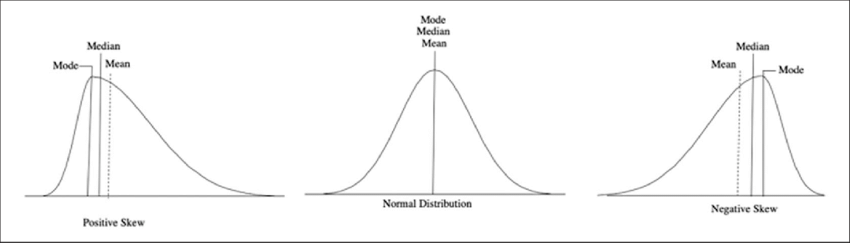

#Day-30:Fucntion Transformation



```
# শুধু numeric column a Used hoi
```



```
How to Understand data is normal or not?
```


*   sns.distplot
*   pd.skew()==0
*   QQ Plot


###QQ plot:

A Q-Q plot (Quantile-Quantile plot) is a statistical tool used to check whether a dataset follows a particular distribution, most commonly a normal distribution.

🔍 What Is a Q-Q Plot?

Plots the quantiles of your data against the quantiles of a theoretical distribution (like normal).

If your data is normally distributed, the points will fall approximately along a straight 45-degree line.

✅ How to Interpret a Q-Q Plot:

Straight diagonal line → Data is normally distributed.

S-shaped curve → Data has heavy tails or light tails.

Curved away from the line → Data is skewed.


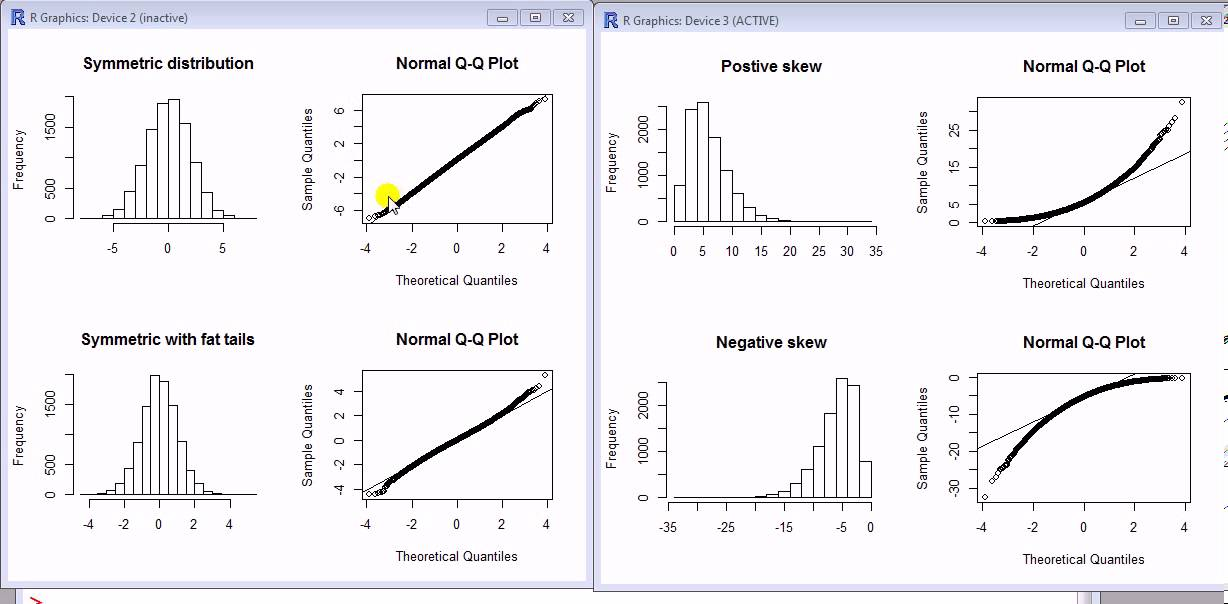


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df=df.iloc[:,[1,2,4,5,6,7,9,11]]

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


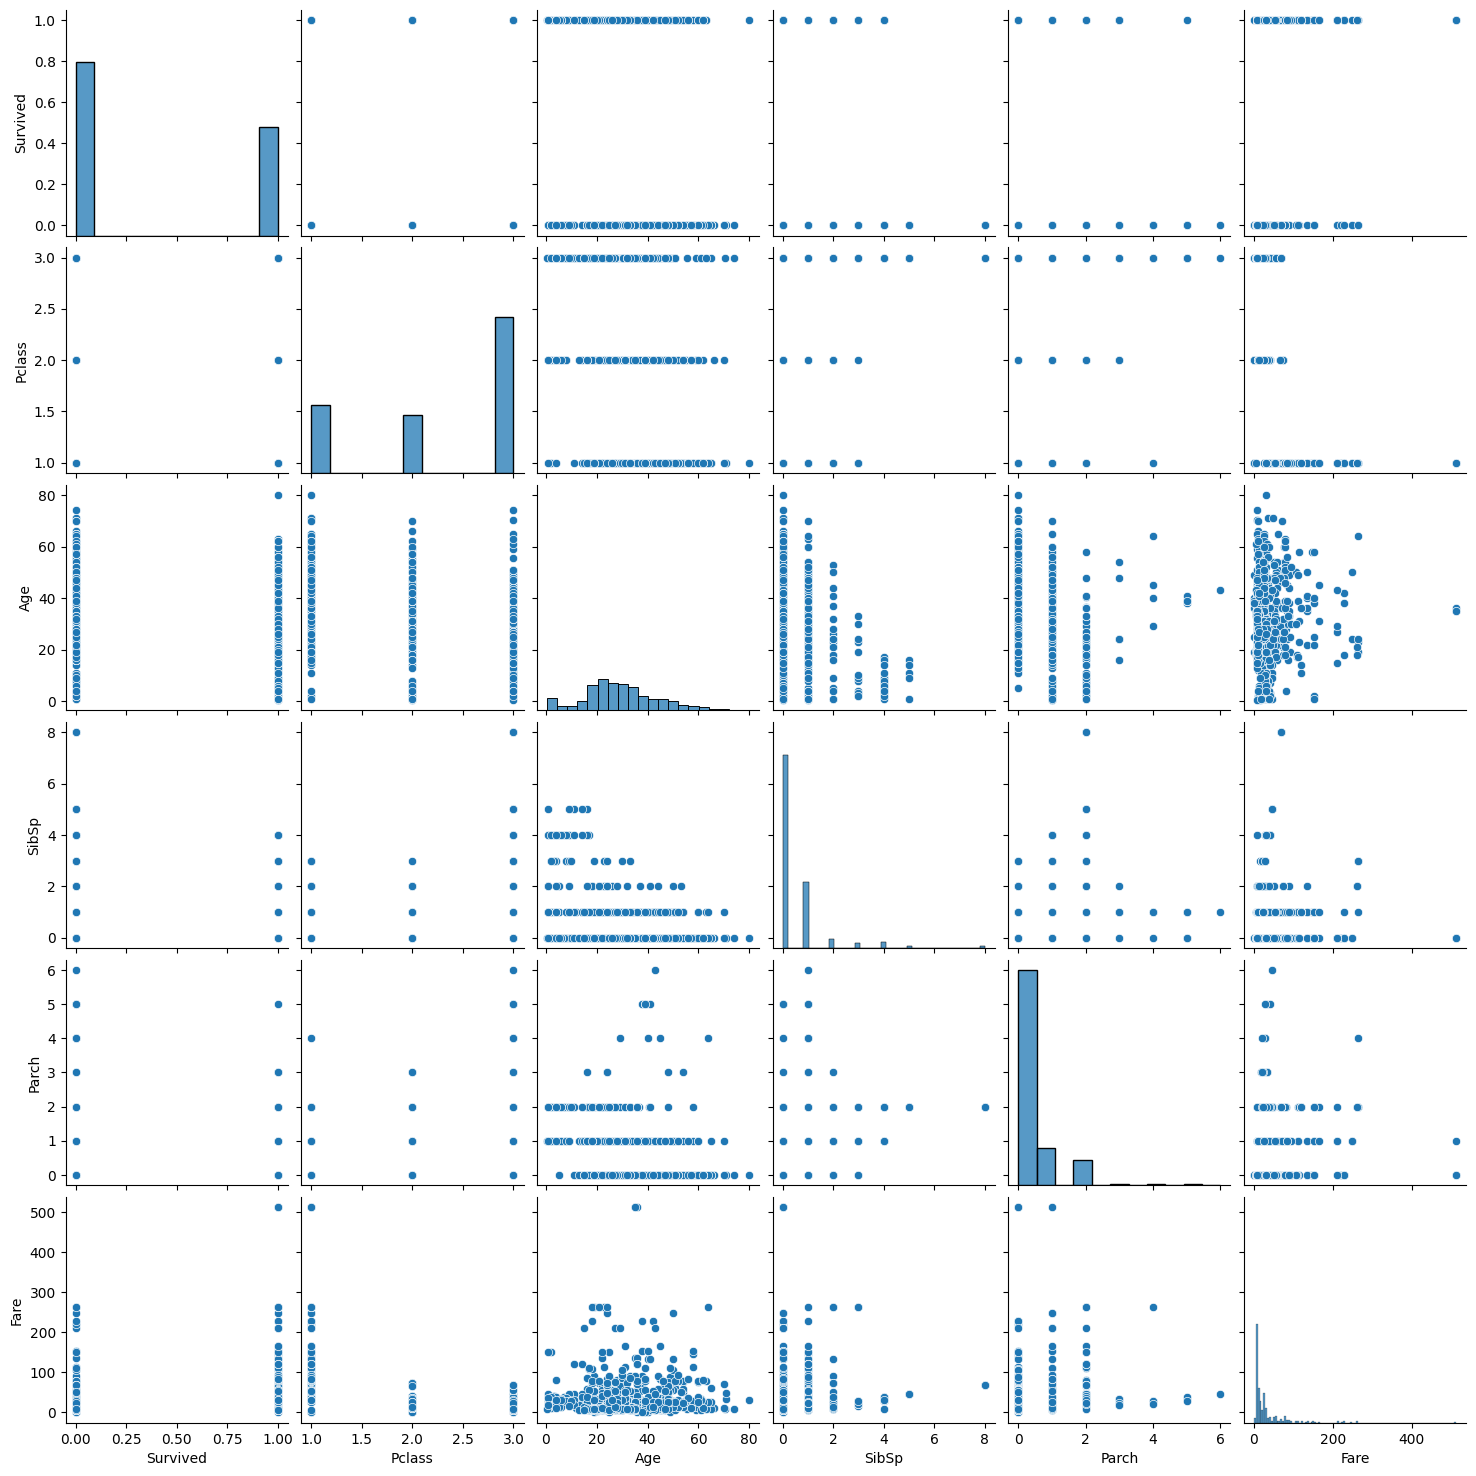

In [ ]:
sns.pairplot(df)

In [ ]:
# df['Age'].fillna(df['Age'].mean(),inplace=True)
# df.isnull().sum()

<ipython-input-237-ca1b29434fca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


Text(0.5, 1.0, 'QQ Plot')

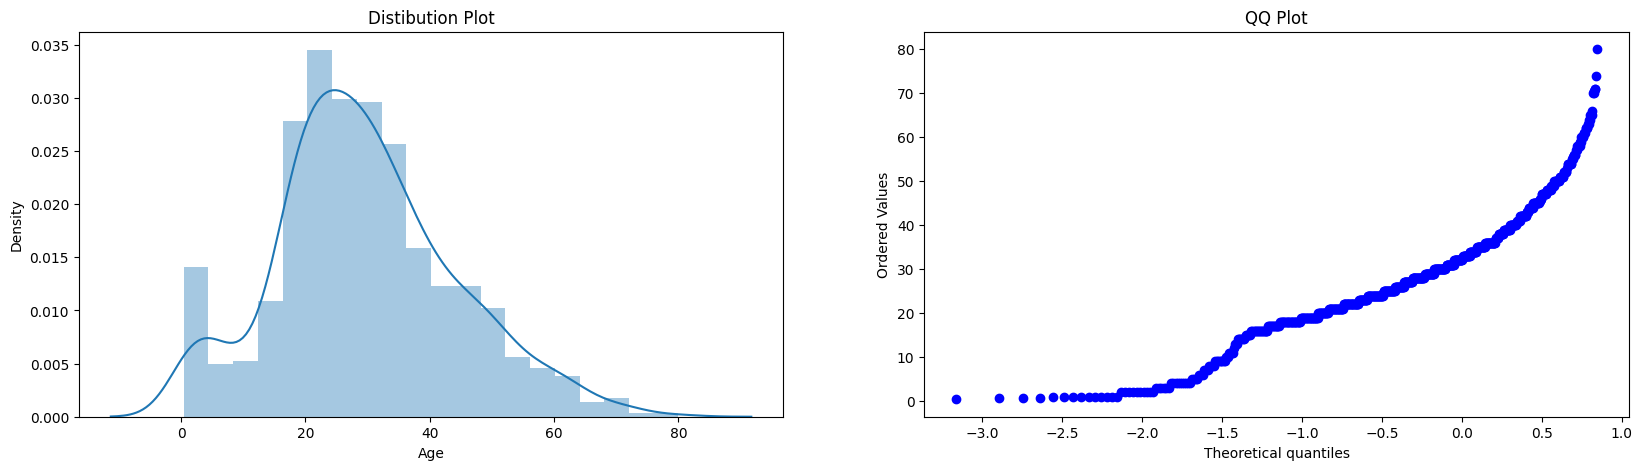

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Distibution Plot')

plt.subplot(122)
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.title('QQ Plot')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
from sklearn.preprocessing import MinMaxScaler
Ct=ColumnTransformer([
    ('ft',MinMaxScaler(),[3])
],remainder='passthrough')

In [ ]:
# Ct=ColumnTransformer([
#     ('ft',FunctionTransformer(np.log1p),['Age'])
# ],remainder='passthrough')

In [ ]:
fited_df=Ct.fit_transform(df)

In [ ]:
np.array(fited_df[:,0],dtype=np.float64)#convert object array to numpy array

array([0.27117366, 0.4722292 , 0.32143755, 0.43453129, 0.43453129,
              nan, 0.67328474, 0.01985423, 0.33400352, 0.17064589,
       0.04498618, 0.72354863, 0.24604172, 0.48479517, 0.17064589,
       0.68585072, 0.01985423,        nan, 0.3842674 ,        nan,
       0.43453129, 0.42196532, 0.18321186, 0.34656949, 0.09525006,
       0.4722292 ,        nan, 0.23347575,        nan,        nan,
       0.49736115,        nan,        nan, 0.8240764 , 0.34656949,
       0.52249309,        nan, 0.25860769, 0.22090978, 0.17064589,
       0.49736115, 0.33400352,        nan, 0.03242021, 0.23347575,
              nan,        nan,        nan,        nan, 0.22090978,
       0.08268409, 0.25860769, 0.61045489, 0.35913546, 0.81151043,
              nan, 0.25860769, 0.35285248, 0.05755215, 0.13294798,
       0.27117366, 0.4722292 , 0.560191  , 0.04498618,        nan,
              nan, 0.35913546, 0.23347575, 0.2083438 , 0.32143755,
       0.39683338, 0.19577783, 0.25860769, 0.32143755, 0.39683

<ipython-input-244-3dfa41174bf4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


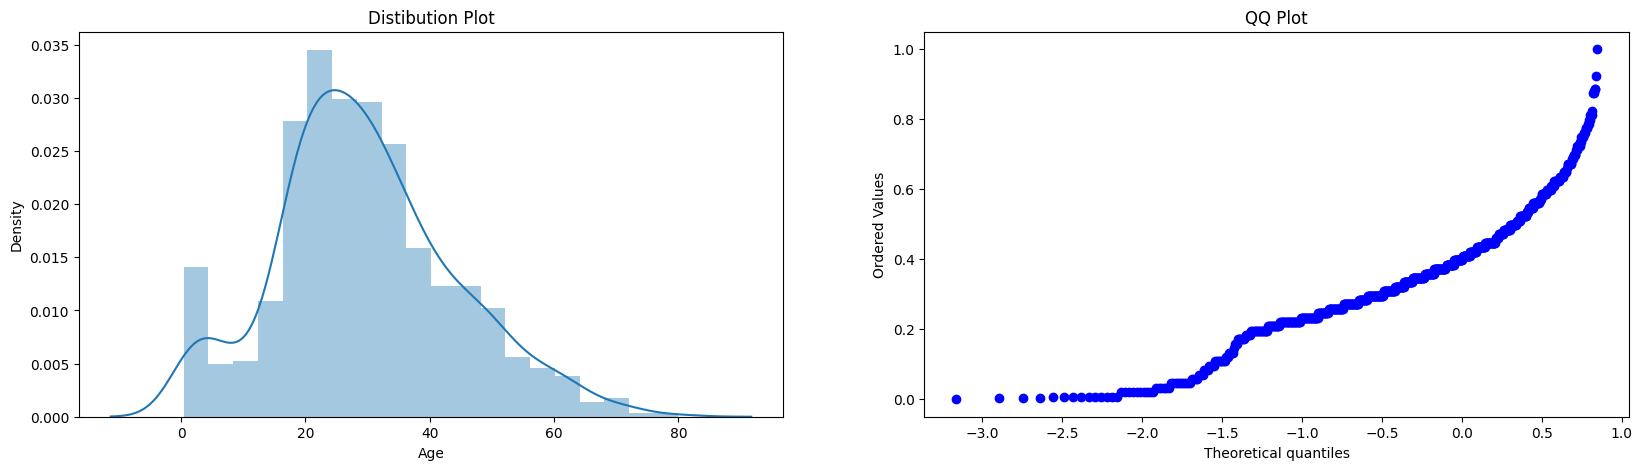

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Distibution Plot')

plt.subplot(122)
stats.probplot(np.array(fited_df[:,0],dtype=np.float64),dist='norm',plot=plt)
plt.title('QQ Plot')
plt.show()

#Target:
* Accuracy of LR,DT
* using data alalysis, which data  should which taransformation to perform batter.

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder

#Analysis:
* Numarical Data should analyze for detection of Which Transformation should use Using Graph(distplot,QQ plot,etc)

<ipython-input-247-c197af16950e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


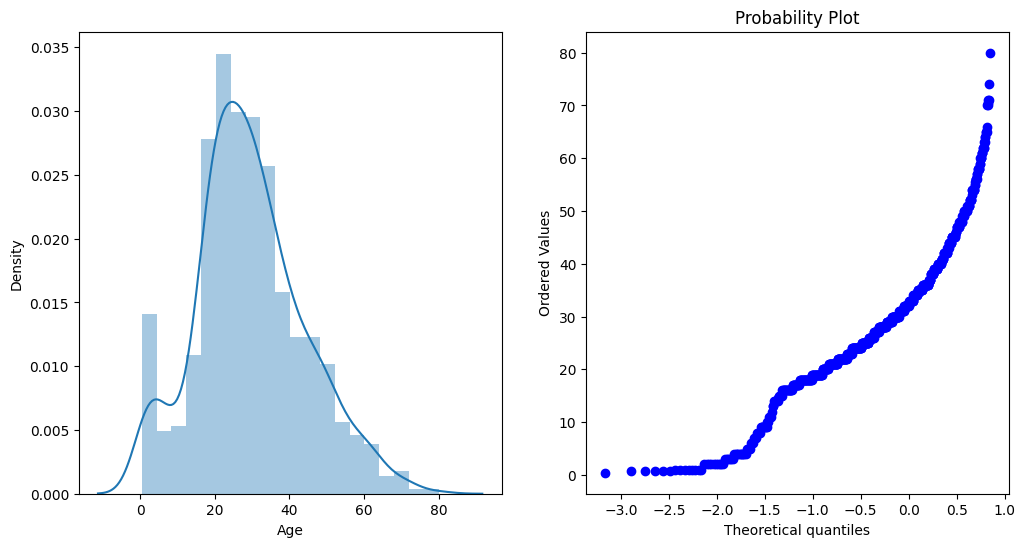

In [ ]:
#we have tow Numarical column (Age and Fare)
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(df['Age'])
plt.subplot(122)
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.show()
#line does not show case of having missing value

In [ ]:
df['Age'].skew()
#we see data little bit skewed,if i want then i can be Function Transformation

np.float64(0.38910778230082704)

<ipython-input-249-a3f41a2ad77d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


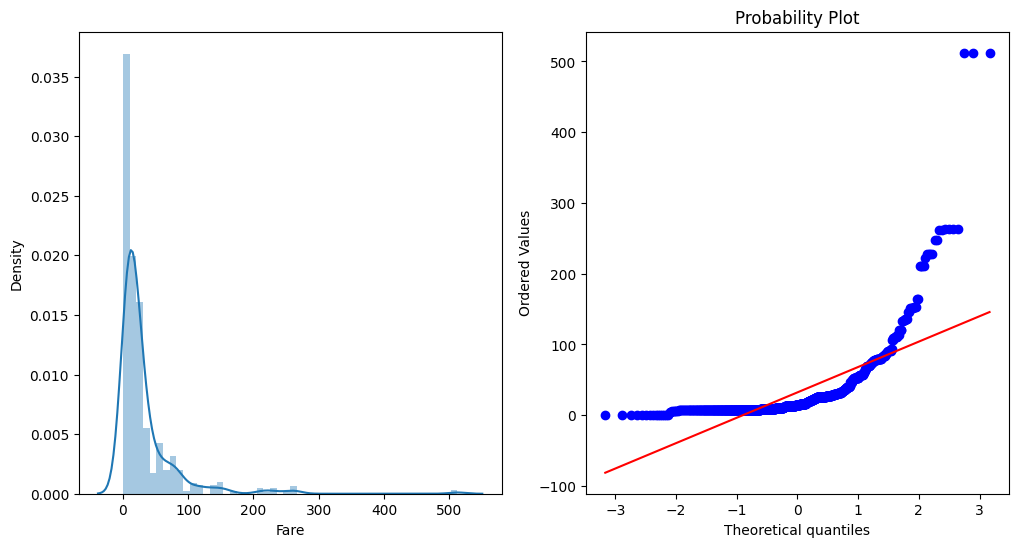

In [ ]:
#we have tow Numarical column (Age and Fare)
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.subplot(122)
stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.show()

In [ ]:
df['Fare'].skew()
#hare we see data is left skewed , That is way if we use LR,LL,SVM,KNN ,we need Functional Transform

np.float64(4.787316519674893)

#Compleate Packege
* Train Test Split
* Missing value Handeling
* Analyze Data about Skewness of is applicable for Function Transformation
* Encoding Catagorical Data
* Scaling data if need
* Feature Selection
* Model Train
* Go though Pipeline
* Find accuracy before and After

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
df.isnull().sum()
#two column contain missing value (Age,Embarked)

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=42)
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [ ]:
#Age--->missing value handeling
#Age+Fare--->log Transform


#for Numerical(int+float)
age_fare_pipe=Pipeline([
    ('age_imp',SimpleImputer()),
    ('age_log_tf',FunctionTransformer(np.log1p))
])


#aikhane Age ar jonne alada pipeline and Fare ar jonne alada pipeline kora jeto kinto oi ta valo poddoti hoto na
#ai khane age ar opr missing value handeling kaj korbe just and Age and Fare ar opor log Transformation kaj korbe.

In [ ]:
temp_ct=ColumnTransformer([
    ('abc',age_fare_pipe,[2,5])
])
age_fare_tf=temp_ct.fit_transform(X_train)
age_fare_tf

array([[3.83945231, 3.38439026],
       [3.17805383, 2.63905733],
       [3.49650756, 2.18885633],
       ...,
       [3.73766962, 2.71524426],
       [2.7080502 , 4.79579055],
       [3.09104245, 4.36038795]])

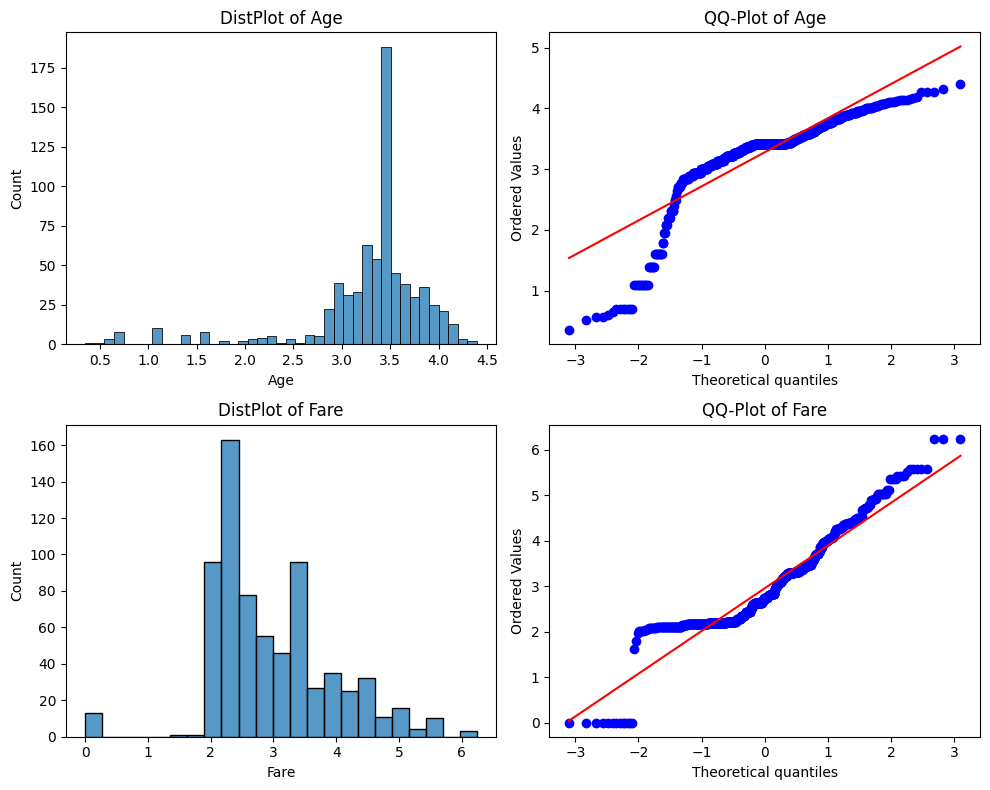

In [ ]:
#analyze ,is function transformation need?
plt.figure(figsize=(10,8))

plt.subplot(221)
sns.histplot(age_fare_tf[:,0])
plt.xlabel('Age')
plt.title("DistPlot of Age")

plt.subplot(222)
stats.probplot(age_fare_tf[:,0].astype(np.float64),plot=plt)
# plt.xlabel('Age')
plt.title("QQ-Plot of Age")

plt.subplot(223)
sns.histplot(age_fare_tf[:,1])
plt.xlabel('Fare')
plt.title("DistPlot of Fare")

plt.subplot(224)
stats.probplot(age_fare_tf[:,1].astype(np.float64),plot=plt)
# plt.xlabel('Age')
plt.title("QQ-Plot of Fare")


plt.tight_layout()

#Age ar Distribution ager thake onk khrap hoise tai opor a age ar modde log transformation bad dite hobe . tai Age and Fare k alada alada pipeline a dia korle valo hobe ai khatre
#Ages are likly Normal Distribution,But Fares are Left Skewed(need to be Normal Distribution for better performance)

In [ ]:
#for pipe2 (Age and Fare Individual Pipeline)

#opor ar 'age_fare_pipe use korle accuracy kharap ashte pare karon age normal distribution(skewness) thik tahke na

#Age pipeline
age_pipe=make_pipeline(SimpleImputer())

# fare Pipeline
fare_pipe=make_pipeline(FunctionTransformer(np.log1p))

In [ ]:
#Embarked---->Missing value handeling
#Embarked+Sex --->Encoding

#for Catagorical(String)
sex_emb_pipe=Pipeline([
    ('emb_imp',SimpleImputer(strategy='most_frequent')),
    ('emb_ohe',OneHotEncoder(dtype=np.int32,drop='first',sparse_output=False,handle_unknown='ignore'))
])

In [ ]:
CT1=ColumnTransformer([
    ('Age_Fare_Pipe',age_fare_pipe,['Age','Fare']),
    ('Sex_Emb_Pipe',sex_emb_pipe,['Sex','Embarked'])
],remainder='passthrough')

In [ ]:
#for pipe2 (Age and Fare Individual Pipeline) [used in pipe2]

CT2=ColumnTransformer([
    ('age_pipe',age_pipe,[2]),
    ('fare_pipe',fare_pipe,[5]),
    ('sex_emb_pipe',sex_emb_pipe,[1,6])
],remainder='passthrough')

In [ ]:
#for pipe3 (Without Log transformation)[used in pipe3]

CT3=make_column_transformer( (age_pipe,['Age']),(sex_emb_pipe,['Sex','Embarked']))

In [ ]:
tf_data=CT1.fit_transform(X_train)
tf_data

array([[3.83945231, 3.38439026, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [3.17805383, 2.63905733, 1.        , ..., 2.        , 0.        ,
        0.        ],
       [3.49650756, 2.18885633, 1.        , ..., 3.        , 0.        ,
        0.        ],
       ...,
       [3.73766962, 2.71524426, 1.        , ..., 3.        , 2.        ,
        0.        ],
       [2.7080502 , 4.79579055, 0.        , ..., 1.        , 1.        ,
        2.        ],
       [3.09104245, 4.36038795, 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
# ct2=ColumnTransformer([
#     ('all_scal',MinMaxScaler(),slice(0,8))
# ])# ai khane remainder='passthrough' use korle error ashbe

In [ ]:
ct3=LogisticRegression()

#Pipe-1 (Age and Fare both applied Log Transformation)

In [ ]:
pipe1=Pipeline([
    ('CT1',CT1),
    # ('ct2',ct2),
    ('scal_all',MinMaxScaler()),
    ('ct3',ct3)
])

pipe1.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('CT1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age_Fare_Pipe',
                                                  Pipeline(steps=[('age_imp',
                                                                   SimpleImputer()),
                                                                  ('age_log_tf',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['Age', 'Fare']),
                                                 ('Sex_Emb_Pipe',
                                                  Pipeline(steps=[('emb_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('emb_ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked'])])),
                ('scal_all', MinMaxScaler()), ('ct3', LogisticRegression())])

In [ ]:
y_pred=pipe1.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7988826815642458

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe1,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.8033290653008963)

#Pipe-2 (Age and Fare Individual Pipeline)

In [ ]:
#for pipe2 (Age and Fare Individual Pipeline)

pipe2=make_pipeline(CT2,MinMaxScaler(),ct3)

pipe2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  [2]),
                                                 ('fare_pipe',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  [5]),
                                                 ('sex_emb_pipe',
                                                  Pipeline(steps=[('emb_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('emb_ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [1, 6])])),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
#for pipe2 (Age and Fare Individual Pipeline)
y_pred=pipe2.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7932960893854749

In [ ]:
#for pipe2 (Age and Fare Individual Pipeline)

from sklearn.model_selection import cross_val_score
cross_val_score(pipe2,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7921008568895893)

#Pipe-3 (Without Log Transformation)

In [ ]:
#for pipe3 (Without Log transformation)

pipe3=Pipeline([
    ('CT3',CT3),
    ('Scaling',StandardScaler()),
    ('model',LogisticRegression())
])

pipe3.fit(X_train,y_train)

Pipeline(steps=[('CT3',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('emb_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('emb_ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked'])])),
                ('Scaling', StandardScaler()),
                ('model', LogisticRegression())])

In [ ]:
#for pipe3 (without Log Transformation)

y_pred=pipe3.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

In [ ]:
#for pipe3 (without Log Transformation)

from sklearn.model_selection import cross_val_score
cross_val_score(pipe2,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7921008568895893)

In [ ]:
def CheckDistribution(fun):
  ft=FunctionTransformer(fun)
  fare_tf=ft.fit_transform(X_train[['Fare']])
  print(fare_tf)
  #analyze ,is function transformation need?
  plt.figure(figsize=(10,8))

  plt.subplot(221)
  sns.histplot(X_train['Fare'])
  plt.xlabel('Fare')
  plt.title("DistPlot of Fare")

  plt.subplot(222)
  stats.probplot(X_train['Fare'],plot=plt)
  # plt.xlabel('Age')
  plt.title("QQ-Plot of Age")

  plt.subplot(223)
  sns.histplot(fare_tf)
  plt.xlabel('Fare')
  plt.title("DistPlot of Fare")

  plt.subplot(224)
  stats.probplot(fare_tf.values.flatten(), plot=plt)
  plt.title("QQ-Plot of Fare (Transformed)")


  plt.tight_layout()


         Fare
331  3.384390
733  2.639057
382  2.188856
704  2.180892
813  3.474293
..        ...
106  2.157559
270  3.465736
860  2.715244
435  4.795791
102  4.360388

[712 rows x 1 columns]


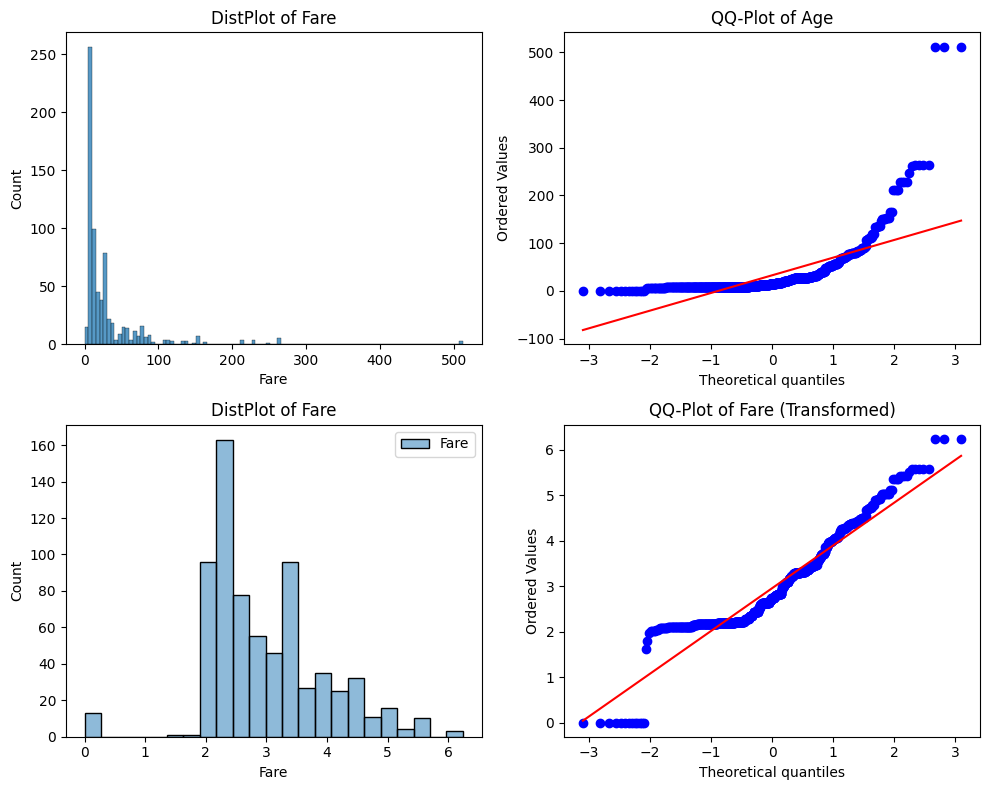

In [ ]:
CheckDistribution(np.log1p)

         Fare
331  0.017544
733  0.038462
382  0.063091
704  0.063660
813  0.015987
..        ...
106  0.065359
270  0.016129
860  0.035440
435  0.004167
102  0.006469

[712 rows x 1 columns]


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


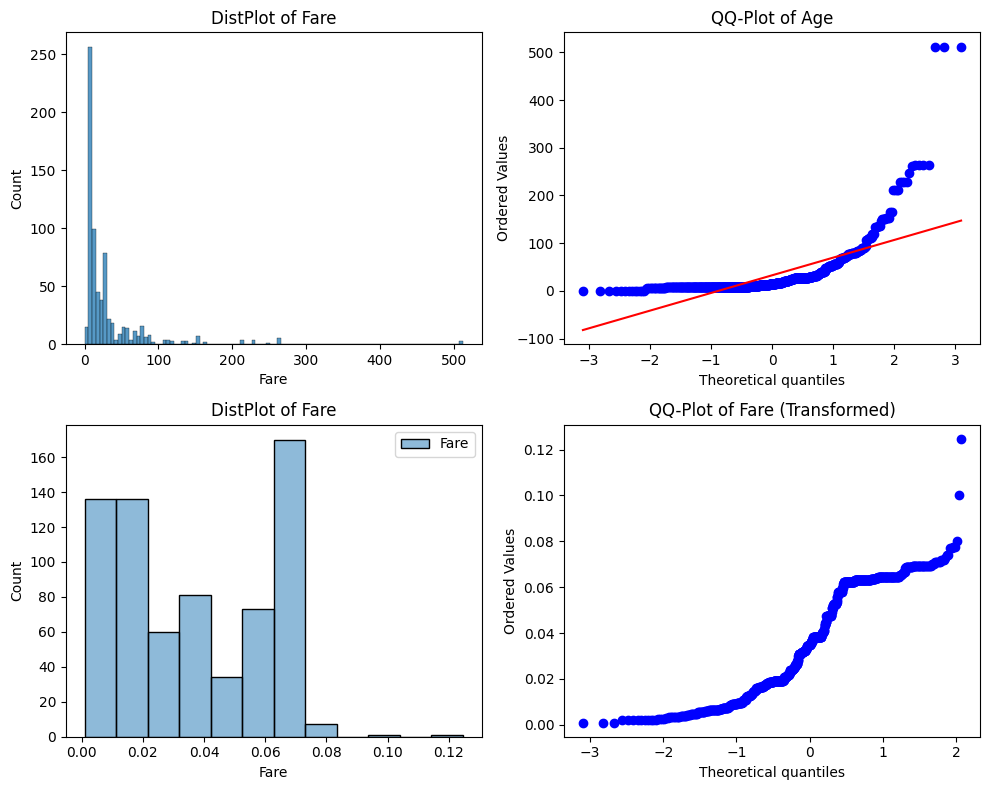

In [ ]:
#check which Function give you More Normarl Distribution and use this function in FunctionTransformation
CheckDistribution(lambda a: 1/(a+a))

In [ ]:
#End of Day-1

#Day-31:Power Transformation

*   Box-Cox
*   Yeo Jhanson




---

## 📘 **1. Formulas**

### ✅ **Box-Cox Transformation**

Used **only for positive values**.

$$
y(\lambda) =
\begin{cases}
\frac{y^\lambda - 1}{\lambda}, & \text{if } \lambda \ne 0 \\
\ln(y), & \text{if } \lambda = 0
\end{cases}
$$

---

### ✅ **Yeo-Johnson Transformation**

Used for **both positive and negative values**.

$$
y(\lambda) =
\begin{cases}
\frac{[(y + 1)^\lambda - 1]}{\lambda}, & y \geq 0, \lambda \ne 0 \\
\ln(y + 1), & y \geq 0, \lambda = 0 \\
\frac{- [(-y + 1)^{2 - \lambda} - 1]}{2 - \lambda}, & y < 0, \lambda \ne 2 \\
- \ln(-y + 1), & y < 0, \lambda = 2
\end{cases}
$$

---

## 🎯 **2. When to Use**

| Transformation  | When to Use                                                     |
| --------------- | --------------------------------------------------------------- |
| **Box-Cox**     | When all your data is **positive** and **right/left skewed**    |
| **Yeo-Johnson** | When data contains **zero or negative values**, or mix of signs |

---

## 📍 **3. Where to Use (Use Cases)**

Both are often used:

* Before **Linear Regression**, **Logistic Regression**, or **SVM** (models that assume normality)
* For **feature engineering** (to make features more Gaussian-like)
* When you want to **stabilize variance**
* When you're preparing data for **parametric models** (those that assume normality)

---

## 💡 **4. Key Differences**

| Feature            | Box-Cox                                   | Yeo-Johnson                                   |
| ------------------ | ----------------------------------------- | --------------------------------------------- |
| Supports Negative? | ❌ No                                      | ✅ Yes                                         |
| Supports Zero?     | ❌ No                                      | ✅ Yes                                         |
| Suitable For?      | Positive data only                        | Any real numbers                              |
| In scikit-learn?   | `power_transform()` with method='box-cox' | `power_transform()` with method='yeo-johnson' |

---

## 🔧 **5. How to Use in Python**

```python
from sklearn.preprocessing import PowerTransformer

# Box-Cox (only positive values)
pt_boxcox = PowerTransformer(method='box-cox')
X_trans_boxcox = pt_boxcox.fit_transform(X)

# Yeo-Johnson (handles negatives too)
pt_yj = PowerTransformer(method='yeo-johnson')
X_trans_yj = pt_yj.fit_transform(X)
```

---

## 🧠 Pro Tips

* If you’re not sure whether your data has negatives or not → use **Yeo-Johnson** (safer choice).
* Always **check skewness** before and after transformation.
* Don't use these transformations with **categorical features**.
* After transformation, it's common to apply **scaling** like `StandardScaler`.




🔄 Function Transformation বনাম Power Transformation


---


| দিক                         | Function Transformation                                                      | Power Transformation                                                                     |
| --------------------------- | ---------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **সংজ্ঞা (Definition)**     | যেকোনো সাধারণ ফাংশন দিয়ে ডেটার transformation (যেমন: log, sqrt, exp ইত্যাদি) | নির্দিষ্ট mathematical family (Box-Cox বা Yeo-Johnson) দিয়ে ডেটাকে normalize করার চেষ্টা |
| **লক্ষ্য (Goal)**           | Distribution কিছুটা ঠিক করা বা scale পরিবর্তন করা                            | Distribution-কে **Gaussian/Normal**-এর কাছাকাছি নিয়ে যাওয়া                               |
| **ব্যবহৃত ফাংশন**           | `np.log`, `np.sqrt`, `np.exp`, `1/x`, ইত্যাদি                                | `PowerTransformer` → method: `box-cox` or `yeo-johnson`                                  |
| **স্কিউড ডেটা হ্যান্ডেলিং** | কিছুটা করে, কিন্তু optimal নয়                                                | স্কিউড ডেটার জন্য বিশেষভাবে ডিজাইন করা                                                   |
| **Parameter optimization**  | না, ইউজার নিজে ফাংশন দিতে হয়                                                 | হ্যাঁ, lambda automatically optimize করে                                                 |
| **Negative value support**  | অনেক ফাংশন সমর্থন করে না (যেমন `log`)                                        | `Box-Cox`: ❌ <br> `Yeo-Johnson`: ✅                                                       |
| **Where used**              | যখন আপনি নিজে জানেন কোন ফাংশনে ডেটা ভালো হয়                                  | যখন আপনি চাচ্ছেন মডেল নিজে best transformation খুঁজে নিক                                 |


In [ ]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       572 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


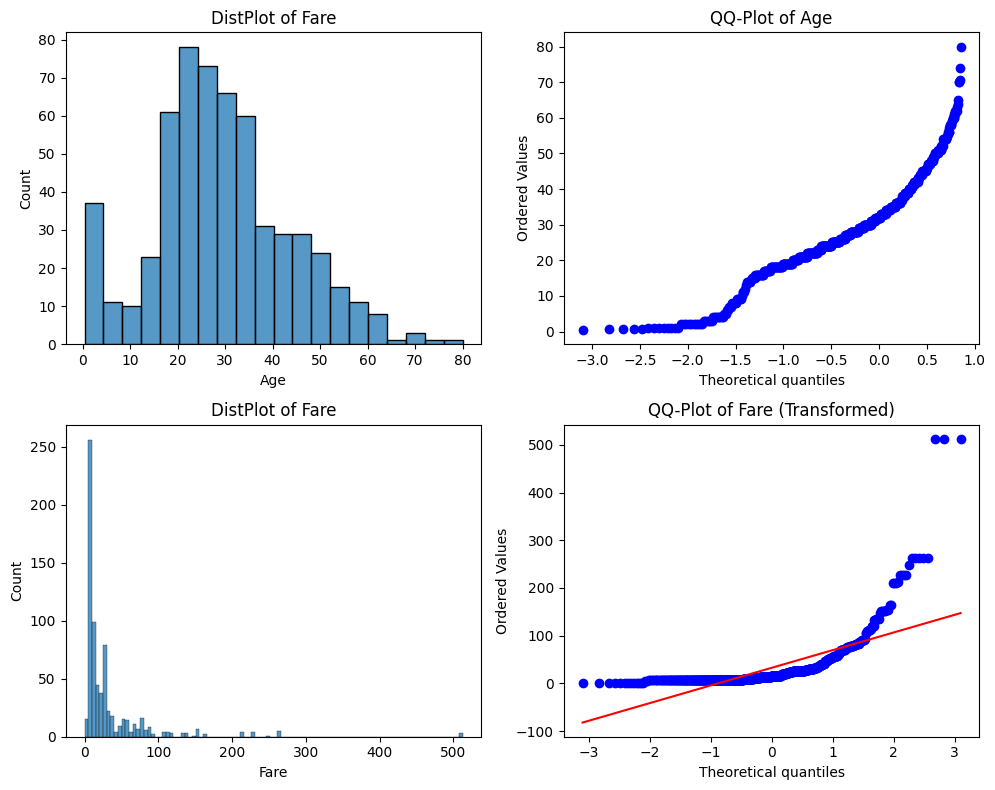

In [ ]:
#Before Power Transformation

plt.figure(figsize=(10,8))

plt.subplot(221)
sns.histplot(X_train['Age'])
plt.xlabel('Age')
plt.title("DistPlot of Fare")

plt.subplot(222)
stats.probplot(X_train['Age'],plot=plt)
# plt.xlabel('Age')
plt.title("QQ-Plot of Age")

plt.subplot(223)
sns.histplot(X_train['Fare'])
plt.xlabel('Fare')
plt.title("DistPlot of Fare")

plt.subplot(224)
stats.probplot(X_train['Fare'], plot=plt)
plt.title("QQ-Plot of Fare (Transformed)")


plt.tight_layout()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
age_fare_pipe=Pipeline([
    ('age_imp',SimpleImputer()),
    ('age_fare_pow_tf',PowerTransformer(method='yeo-johnson'))
])
#Fare or Age contain 0 or (-)ve value thats why we can't use 'box-cox' powerTransfomation

In [ ]:
pow_tf=ColumnTransformer([
    ('age_fare_pipe',age_fare_pipe,['Age','Fare'])
])
pow_tf_data=pow_tf.fit_transform(X_train)
pow_tf_data

array([[ 1.20928949,  0.47999826],
       [-0.4654696 , -0.28375264],
       [ 0.22501445, -0.77244668],
       ...,
       [ 0.88680715, -0.20313477],
       [-1.19799775,  1.78386853],
       [-0.62393578,  1.40043606]])

In [ ]:
pow_tf.named_transformers_['age_fare_pipe'].named_steps['age_fare_pow_tf'].lambdas_

array([ 0.84650131, -0.09664147])

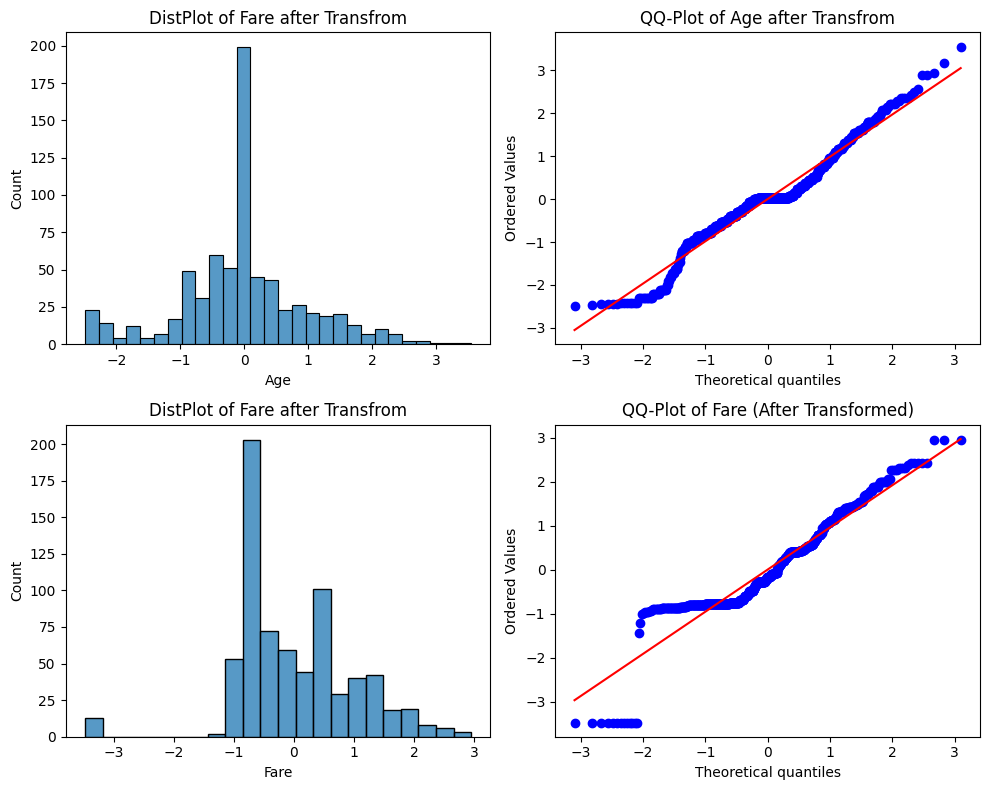

In [ ]:
#After Power Transformation

plt.figure(figsize=(10,8))

plt.subplot(221)
sns.histplot(pow_tf_data[:,0])
plt.xlabel('Age')
plt.title("DistPlot of Fare after Transfrom")

plt.subplot(222)
stats.probplot(pow_tf_data[:,0],plot=plt)
# plt.xlabel('Age')
plt.title("QQ-Plot of Age after Transfrom")

plt.subplot(223)
sns.histplot(pow_tf_data[:,1])
plt.xlabel('Fare')
plt.title("DistPlot of Fare after Transfrom")

plt.subplot(224)
stats.probplot(pow_tf_data[:,1], plot=plt)
plt.title("QQ-Plot of Fare (After Transformed)")


plt.tight_layout()

In [ ]:
sex_emb_pipe=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(dtype=np.int32,drop='first',sparse_output=False,handle_unknown='ignore')

 )

In [ ]:
CT1=ColumnTransformer([
    ('age_fare_pipe',age_fare_pipe,['Age','Fare']),
    ('sex_emb_pipe',sex_emb_pipe,['Sex','Embarked'])
],remainder='passthrough')

In [ ]:
pipe_for_power_tf=make_pipeline(
    CT1,
    StandardScaler(),
    LogisticRegression()
)

In [ ]:
pipe_for_power_tf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_fare_pipe',
                                                  Pipeline(steps=[('age_imp',
                                                                   SimpleImputer()),
                                                                  ('age_fare_pow_tf',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Fare']),
                                                 ('sex_emb_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred=pipe_for_power_tf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8044692737430168

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe_for_power_tf,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7892642568698907)

#Extra for Known

In [ ]:
pt=PowerTransformer()
pt.fit_transform(X_train[['Age','Fare']])
pt.lambdas_

# aikhane age a missing value ase bole Lambdas ar mand kom hocce  na hoi opor ar shate thik ei ase

array([ 0.78461262, -0.09664147])